Brant Marvel Santosa - 0706022310005

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

from imblearn.over_sampling import SMOTENC

In [2]:
# load dataset
pd.set_option('display.max_columns', None) # Display all columns

url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/Bank%20(1).csv"
df = pd.read_csv(url, sep=';')
display(df.head())

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [3]:
# get info from dataset
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [4]:
# get statistical info from dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


# Preprocessing


In [5]:
# show unique values from dataset
unique_values = {col: df[col].unique() for col in df.columns}
display(unique_values)

{'age': array([30, 33, 35, 59, 36, 39, 41, 43, 20, 31, 40, 56, 37, 25, 38, 42, 44,
        26, 55, 67, 53, 68, 32, 49, 78, 23, 52, 34, 61, 45, 48, 57, 54, 63,
        51, 29, 50, 27, 60, 28, 21, 58, 22, 46, 24, 77, 75, 47, 70, 65, 64,
        62, 66, 19, 81, 83, 80, 71, 72, 69, 79, 73, 86, 74, 76, 87, 84]),
 'job': array(['unemployed', 'services', 'management', 'blue-collar',
        'self-employed', 'technician', 'entrepreneur', 'admin.', 'student',
        'housemaid', 'retired', 'unknown'], dtype=object),
 'marital': array(['married', 'single', 'divorced'], dtype=object),
 'education': array(['primary', 'secondary', 'tertiary', 'unknown'], dtype=object),
 'default': array(['no', 'yes'], dtype=object),
 'balance': array([ 1787,  4789,  1350, ...,  -333, -3313,  1137]),
 'housing': array(['no', 'yes'], dtype=object),
 'loan': array(['no', 'yes'], dtype=object),
 'contact': array(['cellular', 'unknown', 'telephone'], dtype=object),
 'day': array([19, 11, 16,  3,  5, 23, 14,  6, 17, 20,

In [6]:
# Check if there is any duplicate rows

print('Duplicate rows:', df.duplicated().sum())

Duplicate rows: 0


In [7]:
# Show missing values per column

print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


# Visualization


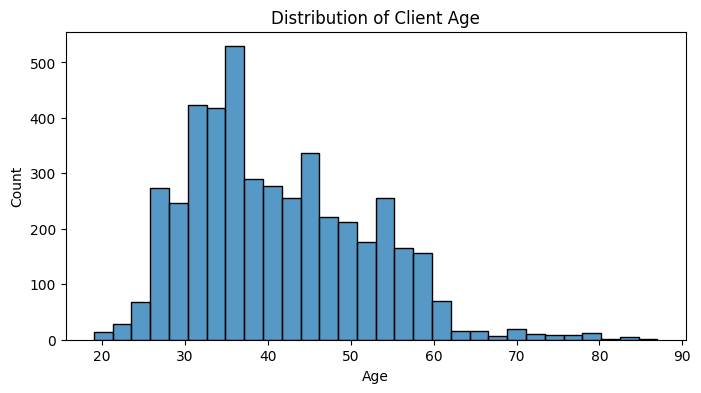

In [8]:
# Visualization 1: Age distribution + target overlay
plt.figure(figsize=(8,4))
sns.histplot(data=df, x='age', bins=30, kde=False)
plt.title('Distribution of Client Age')
plt.xlabel('Age')
plt.show()

This visualization shows the distribution of client ages in the dataset.

From the histogram, we can see that most clients are between 30 and 50 years old, with the highest number of clients around 35 years old. The number of clients gradually decreases as age increases beyond 50. Very few clients are older than 70 or younger than 25.

In simple terms, this means that the dataset is mostly made up of middle-aged clients, while younger and older clients are much less common.

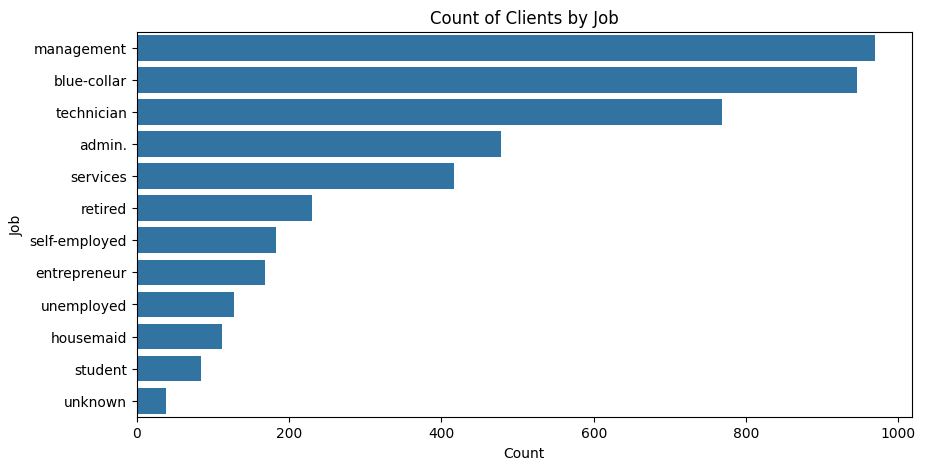

In [9]:
# Visualization 2: Job counts and subscription rate per job
plt.figure(figsize=(10,5))
job_order = df['job'].value_counts().index
sns.countplot(data=df, y='job', order=job_order)
plt.title('Count of Clients by Job')
plt.xlabel('Count')
plt.ylabel('Job')
plt.show()

This visualization shows the number of clients in each job category.

From the bar chart, we can see that most clients work in management, blue-collar, and technician jobs — these are the top three groups with the highest counts. Jobs such as admin, services, and retired also have a fair number of clients.

On the other hand, there are fewer clients who are students, housemaids, or unemployed, and very few are listed as unknown.

In simple terms, the dataset mostly represents working professionals, especially those in management and blue-collar positions, while students and unemployed individuals make up only a small portion of the clients.

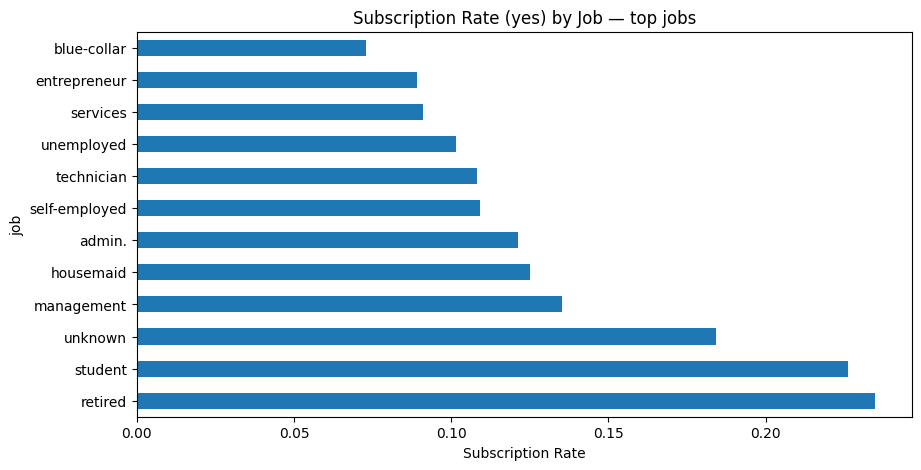

In [10]:
# Subcription rate by job
job_sub = df.groupby('job')['y'].value_counts(normalize=True).unstack().fillna(0)
job_sub = job_sub.rename(columns={'no':'no_rate','yes':'yes_rate'})
job_sub['yes_rate'].sort_values(ascending=False).head(10)


plt.figure(figsize=(10,5))
job_sub['yes_rate'].sort_values(ascending=False).plot(kind='barh')
plt.title('Subscription Rate (yes) by Job — top jobs')
plt.xlabel('Subscription Rate')
plt.show()

This visualization shows the subscription rate (yes) by job category — meaning how many people from each job type agreed to subscribe compared to others.

From the bar chart, we can see that retired clients and students have the highest subscription rates, meaning they are more likely to subscribe. People in management and those with unknown job status also show relatively high subscription rates.

On the other hand, jobs like blue-collar, entrepreneur, and services have the lowest subscription rates, indicating that clients from these groups are less likely to subscribe.

In simple terms, retired and student clients are the most responsive, while working-class groups such as blue-collar and service workers are less likely to subscribe.

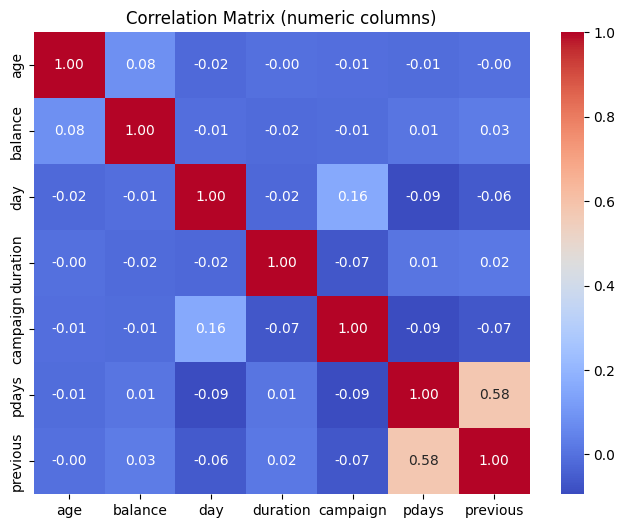

In [11]:
# Visualization 3: Correlation heatmap for numeric features
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix (numeric columns)')
plt.show()

The correlation heatmap shows the relationships between all numeric features in the dataset. Most of the features, such as age, balance, day, duration, and campaign, have very weak or almost no correlation with each other, as the values are close to zero. This means that these variables are mostly independent and do not strongly influence one another. However, there is one noticeable moderate positive correlation between pdays and previous (with a correlation value of about 0.58). This suggests that the number of days since the last contact is somewhat related to the number of previous contacts a client has had. Overall, the heatmap indicates that there is no serious multicollinearity problem among the numeric features, making them suitable for use together in further modeling.

# Feature Encoding

In [12]:
# duplicate df
df_encoded = df.copy()

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# 1. One-Hot Encoding
# Columns: Attrition, Gender, OverTime

one_hot_map = {
    'default': {'no': 0, 'yes': 1},
    'housing': {'no': 0, 'yes': 1},
    'loan': {'no': 0, 'yes': 1},
    'y': {'no': 0, 'yes': 1}
}

for col, mapping in one_hot_map.items():
    df_encoded[col] = df_encoded[col].map(mapping)


# 2. Ordinal Encoding
marital_mapping = {'married': 0, 'single': 1, 'divorced': 2}
df_encoded['marital'] = df_encoded['marital'].map(marital_mapping)


# 3. Nominal Encoding
# Suppose you already fitted the encoder:
nominal_cols = ['job', 'contact', 'month', 'poutcome', 'education']
encoder = OrdinalEncoder()
df_encoded[nominal_cols] = encoder.fit_transform(df_encoded[nominal_cols])

# Build a mapping dictionary
encode_dict = {}

for col, cats in zip(nominal_cols, encoder.categories_):
    encode_dict[col] = {category: int(code) for code, category in enumerate(cats)}

# Show the full dictionary
import pprint
pprint.pprint(encode_dict)

df_encoded.sample(n = 5)

{'contact': {'cellular': 0, 'telephone': 1, 'unknown': 2},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'job': {'admin.': 0,
         'blue-collar': 1,
         'entrepreneur': 2,
         'housemaid': 3,
         'management': 4,
         'retired': 5,
         'self-employed': 6,
         'services': 7,
         'student': 8,
         'technician': 9,
         'unemployed': 10,
         'unknown': 11},
 'month': {'apr': 0,
           'aug': 1,
           'dec': 2,
           'feb': 3,
           'jan': 4,
           'jul': 5,
           'jun': 6,
           'mar': 7,
           'may': 8,
           'nov': 9,
           'oct': 10,
           'sep': 11},
 'poutcome': {'failure': 0, 'other': 1, 'success': 2, 'unknown': 3}}


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4373,28,1.0,0,1.0,0,225,1,1,2.0,7,8.0,866,2,-1,0,3.0,0
670,40,1.0,0,1.0,0,11084,0,0,2.0,11,6.0,113,1,-1,0,3.0,0
3147,52,10.0,0,1.0,0,-9,0,0,2.0,9,6.0,123,1,-1,0,3.0,0
4324,50,4.0,2,2.0,0,100,1,1,0.0,13,8.0,157,1,299,3,0.0,0
991,37,0.0,0,2.0,0,3913,1,0,0.0,27,0.0,124,1,-1,0,3.0,1


In [13]:
# checking encode result
df.loc[480]

,480
age,37
job,management
marital,single
education,unknown
default,no
balance,715
housing,yes
loan,no
contact,unknown
day,20


# Seperate features and target

In [14]:
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

In [15]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,30,10.0,0,0.0,0,1787,0,0,0.0,19,10.0,79,1,-1,0,3.0
1,33,7.0,0,1.0,0,4789,1,1,0.0,11,8.0,220,1,339,4,0.0
2,35,4.0,1,2.0,0,1350,1,0,0.0,16,0.0,185,1,330,1,0.0
3,30,4.0,0,2.0,0,1476,1,1,2.0,3,6.0,199,4,-1,0,3.0
4,59,1.0,0,1.0,0,0,1,0,2.0,5,8.0,226,1,-1,0,3.0


In [16]:
y.head()

,y
0,0
1,0
2,0
3,0
4,0


# Split Data

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [18]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((3164, 16), (1357, 16))

In [19]:
X_train.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
565,40,9.0,0,1.0,0,56,1,1,0.0,29,4.0,194,1,247,1,0.0
3480,47,7.0,0,1.0,0,440,1,0,2.0,12,6.0,91,1,-1,0,3.0
2125,52,9.0,0,1.0,0,3554,0,1,0.0,8,5.0,89,1,-1,0,3.0
3452,31,0.0,0,1.0,0,0,1,0,0.0,29,5.0,82,5,-1,0,3.0
1667,33,1.0,0,1.0,0,-346,1,1,2.0,23,8.0,29,3,-1,0,3.0


In [20]:
X_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4274,35,1.0,0,0.0,0,378,1,0,2.0,16,8.0,427,3,-1,0,3.0
72,31,4.0,1,2.0,0,6248,1,0,2.0,9,8.0,154,2,-1,0,3.0
1065,30,10.0,0,2.0,0,0,1,0,0.0,18,9.0,756,1,-1,0,3.0
3185,42,0.0,0,1.0,0,529,1,1,0.0,19,9.0,193,3,-1,0,3.0
130,41,1.0,0,0.0,0,168,1,0,0.0,18,9.0,187,3,-1,0,3.0


# Oversampling

In [21]:
# using SMOTE-NC for dataset containing numerical and categorical features.

from imblearn.over_sampling import SMOTENC

# we should define the categorical features first to make oversampling more accurate
categorical_features = [
    'job',
    'marital',
    'education',
    'default',
    'housing',
    'loan',
    'contact',
    'month',
    'poutcome',
]

smotenc = SMOTENC(categorical_features=categorical_features, random_state=42)
X_train_res, y_train_res = smotenc.fit_resample(X_train, y_train)

# dont forget to always do partitioning AFTER undersampling/oversampling
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# check the shape of X_train and X_test
X_train.shape, X_test.shape

((3164, 16), (1357, 16))

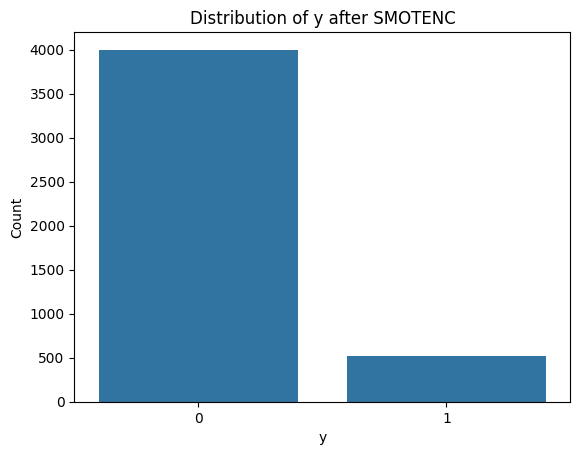

In [22]:
# just to visualize the distribution of target class after SMOTENC

sns.countplot(x=y)
plt.title('Distribution of y after SMOTENC')
plt.xlabel('y')
plt.ylabel('Count')
plt.show()

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


#Model Development

In [24]:
# Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

dt = DecisionTreeClassifier(random_state=42)
grid_dt = GridSearchCV(dt, dt_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_dt.fit(X_train_res, y_train_res)

best_dt = grid_dt.best_estimator_
y_pred_dt = best_dt.predict(X_test)

print("\n=== Decision Tree Results ===")
print("Best Parameters:", grid_dt.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


=== Decision Tree Results ===
Best Parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Accuracy: 0.8533529845246868
              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1190
           1       0.42      0.48      0.45       167

    accuracy                           0.85      1357
   macro avg       0.67      0.69      0.68      1357
weighted avg       0.86      0.85      0.86      1357



In [25]:
# Random Forest Classifier
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

rf = RandomForestClassifier(random_state=42)
grid_rf = GridSearchCV(rf, rf_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_rf.fit(X_train_res, y_train_res)

best_rf = grid_rf.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("\n=== Random Forest Results ===")
print("Best Parameters:", grid_rf.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))


=== Random Forest Results ===
Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.8658806190125277
              precision    recall  f1-score   support

           0       0.93      0.92      0.92      1190
           1       0.46      0.50      0.48       167

    accuracy                           0.87      1357
   macro avg       0.69      0.71      0.70      1357
weighted avg       0.87      0.87      0.87      1357



In [26]:
# XGBoost Classifier
import xgboost as xgb
xgb_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

xgb_clf = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
grid_xgb = GridSearchCV(xgb_clf, xgb_params, cv=5, scoring='accuracy', n_jobs=-1)
grid_xgb.fit(X_train_res, y_train_res)

best_xgb = grid_xgb.best_estimator_
y_pred_xgb = best_xgb.predict(X_test)

print("\n=== XGBoost Results ===")
print("Best Parameters:", grid_xgb.best_params_)
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [16:23:17] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



=== XGBoost Results ===
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Accuracy: 0.8813559322033898
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      1190
           1       0.52      0.54      0.53       167

    accuracy                           0.88      1357
   macro avg       0.73      0.73      0.73      1357
weighted avg       0.88      0.88      0.88      1357



# Model Evaluation

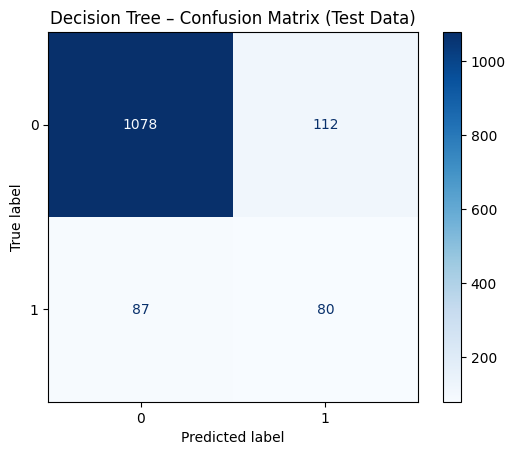

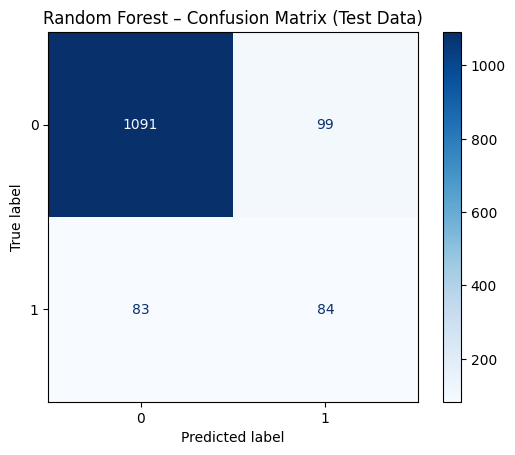

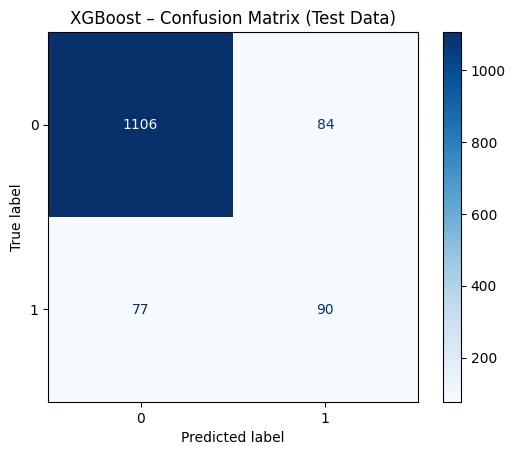

In [32]:
# Confusion Matrix
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    confusion_matrix, ConfusionMatrixDisplay
)
import matplotlib.pyplot as plt
import pandas as pd

def evaluate_model(model, X_train, y_train, X_test, y_test, name):
    # Predictions
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Metrics for training data
    train_acc = accuracy_score(y_train, y_pred_train)
    train_prec = precision_score(y_train, y_pred_train)
    train_rec = recall_score(y_train, y_pred_train)
    train_f1 = f1_score(y_train, y_pred_train)

    # Metrics for test data
    test_acc = accuracy_score(y_test, y_pred_test)
    test_prec = precision_score(y_test, y_pred_test)
    test_rec = recall_score(y_test, y_pred_test)
    test_f1 = f1_score(y_test, y_pred_test)

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred_test)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f"{name} – Confusion Matrix (Test Data)")
    plt.show()

    return {
        "Model": name,
        "Train Accuracy": train_acc,
        "Test Accuracy": test_acc,
        "Precision": test_prec,
        "Recall": test_rec,
        "F1-score": test_f1
    }

# Evaluate all models
results = []
results.append(evaluate_model(best_dt, X_train_res, y_train_res, X_test, y_test, "Decision Tree"))
results.append(evaluate_model(best_rf, X_train_res, y_train_res, X_test, y_test, "Random Forest"))
results.append(evaluate_model(best_xgb, X_train_res, y_train_res, X_test, y_test, "XGBoost"))



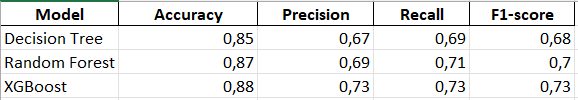

#Discussion & Insights



*   From the comparison table, it can be seen that XGBoost achieved the best overall performance among the three models, with an accuracy of 0.88, precision of 0.73, recall of 0.73, and F1-score of 0.73. This indicates that XGBoost is more effective in correctly identifying both positive and negative classes compared to Decision Tree and Random Forest.
The Decision Tree model, while simpler, shows the lowest accuracy (0.85) and recall (0.69), meaning it struggles more in detecting the positive class (clients who subscribed).
The Random Forest model performs better than Decision Tree with an accuracy of 0.87, showing that using multiple trees improves prediction stability and reduces overfitting.

*   The ensemble methods, such as Random Forest and XGBoost, clearly improved the performance compared to a single Decision Tree model. While the Decision Tree achieved good accuracy (0.85), it struggled more with recall and F1-score, which indicates that it missed some potential subscribers. Random Forest improved these scores (accuracy 0.87), showing that combining many trees helps reduce overfitting and provides more stable predictions. However, XGBoost went even further by improving both precision and recall. This shows that advanced ensemble techniques like boosting can better capture complex relationships in the data and make more accurate predictions.

*   From a business perspective, these insights can help the bank design a smarter and more efficient marketing strategy. Using the XGBoost model, the bank can identify clients who are most likely to subscribe and focus marketing efforts on them. This means fewer wasted calls or messages to uninterested clients and more successful conversions with less cost. For example, the bank could use model predictions to prioritize leads for personal offers, email campaigns, or follow-up calls. Additionally, the bank can analyze which features (like age, job type, or account balance) most influence subscriptions to understand customer behavior better. By applying these insights, the bank can target the right customers, personalize offers, and improve campaign effectiveness, ultimately increasing customer engagement and overall profit.



